In [1]:
import sys
import json
sys.path.append("..")
from utils.chem_utils import display_img
from datastructs.abs_tree import AbsTree, visualize_trees_from_data, collect_reactions

# Generating higher-level (abstracted) routes

### 1) Route given as a list of atom-mapped smiles strings

In [2]:
# Example route is a list of atom-mapped SMILES strings in the forward direction (reactants>reagents>products)
example_route = [
  "[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[OH:22])[cH:20][cH:21]1.[NH2:18][CH3:19]>C1CCOC1.CCN(C(C)C)C(C)C.CCN=C=NCCCN(C)C.CN(C)C=O.Cl.On1nnc2ccccc21>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[NH:18][CH3:19])[cH:20][cH:21]1",
  "[c:1]1([O:31][S:32]([C:33]([F:34])([F:35])[F:36])(=[O:37])=[O:38])[cH:12][cH:13][c:14]2[o:15][c:16](-[c:17]3[cH:18][cH:19][c:20]([F:21])[cH:22][cH:23]3)[c:24]([C:25](=[O:26])[NH:27][CH3:28])[c:29]2[cH:30]1.[c:2]1([B:39]([OH:40])[OH:41])[cH:3][c:4]([C:5]([OH:6])=[O:7])[cH:8][cH:9][c:10]1[Cl:11]>C1COCCO1.Cl.O.O=C([O-])[O-].[Cs+].[Cs+].c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2)(c2ccccc2)c2ccccc2)([P](c2ccccc2)(c2ccccc2)c2ccccc2)[P](c2ccccc2)(c2ccccc2)c2ccccc2)cc1>[c:1]1(-[c:2]2[cH:3][c:4]([C:5]([OH:6])=[O:7])[cH:8][cH:9][c:10]2[Cl:11])[cH:12][cH:13][c:14]2[o:15][c:16](-[c:17]3[cH:18][cH:19][c:20]([F:21])[cH:22][cH:23]3)[c:24]([C:25](=[O:26])[NH:27][CH3:28])[c:29]2[cH:30]1",
  "[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1.[S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])(=[O:19])[N:29]([c:30]1[cH:31][cH:32][cH:33][cH:34][cH:35]1)[S:36]([C:37]([F:38])([F:39])[F:40])(=[O:41])=[O:42]>CCN(CC)CC.ClCCl>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([O:12][S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])=[O:19])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1"
]

In [3]:
route_id = 'ExampleRoute'
abs_tree = AbsTree(example_route, route_id)
route_data = abs_tree.get_abstraction_data()
route_data # with metadata, 

{'route_id': 'ID_ExampleRoute',
 'original_tree': {'depth': 3, 'num_reactions': 3, 'reaction_ids': [0, 1, 2]},
 'subtrees': [{'subtree_id': 'ID_ExampleRoute_0',
   'num_reactions': (3, 2),
   'depth': (3, 2),
   'reactions': [{'_id': 'ID_ExampleRoute_0_0',
     'reaction_smiles': '[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[OH:22])[cH:20][cH:21]1.[NH2:18][CH3:19]>C1CCOC1.CCN(C(C)C)C(C)C.CCN=C=NCCCN(C)C.CN(C)C=O.Cl.On1nnc2ccccc21>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[NH:18][CH3:19])[cH:20][cH:21]1',
     'abstracted_reaction_smiles': '[4CH:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12.[CH3:1][1NH2:2]>>[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12'},
    {'_id': 'ID_ExampleRoute_0_2'

### 2) Route given as  list of dictionaries with specified reaction id (same reaction smiles as 1)

In [4]:
example_route_with_id = [
  {
    "_id": 0,
    "reaction_smiles": "[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[OH:22])[cH:20][cH:21]1.[NH2:18][CH3:19]>C1CCOC1.CCN(C(C)C)C(C)C.CCN=C=NCCCN(C)C.CN(C)C=O.Cl.On1nnc2ccccc21>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[NH:18][CH3:19])[cH:20][cH:21]1",
    "patent_id": "PatentID"
  },
  {
    "_id": 1,
    "reaction_smiles": "[c:1]1([O:31][S:32]([C:33]([F:34])([F:35])[F:36])(=[O:37])=[O:38])[cH:12][cH:13][c:14]2[o:15][c:16](-[c:17]3[cH:18][cH:19][c:20]([F:21])[cH:22][cH:23]3)[c:24]([C:25](=[O:26])[NH:27][CH3:28])[c:29]2[cH:30]1.[c:2]1([B:39]([OH:40])[OH:41])[cH:3][c:4]([C:5]([OH:6])=[O:7])[cH:8][cH:9][c:10]1[Cl:11]>C1COCCO1.Cl.O.O=C([O-])[O-].[Cs+].[Cs+].c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2)(c2ccccc2)c2ccccc2)([P](c2ccccc2)(c2ccccc2)c2ccccc2)[P](c2ccccc2)(c2ccccc2)c2ccccc2)cc1>[c:1]1(-[c:2]2[cH:3][c:4]([C:5]([OH:6])=[O:7])[cH:8][cH:9][c:10]2[Cl:11])[cH:12][cH:13][c:14]2[o:15][c:16](-[c:17]3[cH:18][cH:19][c:20]([F:21])[cH:22][cH:23]3)[c:24]([C:25](=[O:26])[NH:27][CH3:28])[c:29]2[cH:30]1",
    "patent_id": "PatentID"
  },
  {
    "_id": 2,
    "reaction_smiles": "[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1.[S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])(=[O:19])[N:29]([c:30]1[cH:31][cH:32][cH:33][cH:34][cH:35]1)[S:36]([C:37]([F:38])([F:39])[F:40])(=[O:41])=[O:42]>CCN(CC)CC.ClCCl>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([O:12][S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])=[O:19])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1",
    "patent_id": "PatentID"
  }
]

In [5]:
route_id = 'ExampleRoute'
abs_tree = AbsTree(example_route_with_id, route_id)
route_data = abs_tree.get_abstraction_data()
route_data

{'route_id': 'PatentID_ExampleRoute',
 'original_tree': {'depth': 3, 'num_reactions': 3, 'reaction_ids': [0, 1, 2]},
 'subtrees': [{'subtree_id': 'PatentID_ExampleRoute_0',
   'num_reactions': (3, 2),
   'depth': (3, 2),
   'reactions': [{'_id': 'PatentID_ExampleRoute_0_0',
     'reaction_smiles': '[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[OH:22])[cH:20][cH:21]1.[NH2:18][CH3:19]>C1CCOC1.CCN(C(C)C)C(C)C.CCN=C=NCCCN(C)C.CN(C)C=O.Cl.On1nnc2ccccc21>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[NH:18][CH3:19])[cH:20][cH:21]1',
     'abstracted_reaction_smiles': '[4CH:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12.[CH3:1][1NH2:2]>>[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12'},
    {'_id': 'Pa

# Visualizing results

## Route

Abstracted tree 0


Original tree


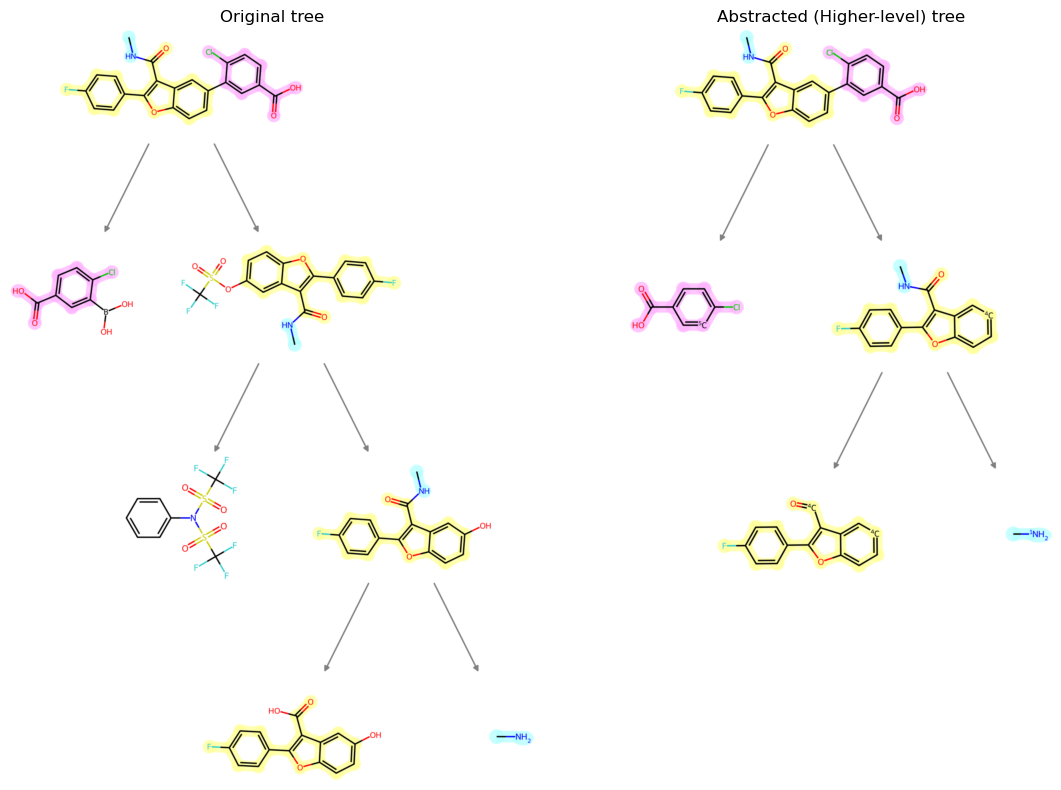

In [6]:
#visualize_trees_from_data(route_data, img_scale = 0.9)
abs_tree.visualize_trees(img_scale=0.8)

## Reactions

### Original route reactions

In [7]:
original_route, higherlev_route = collect_reactions(route_data)
original_route

['[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[OH:22])[cH:20][cH:21]1.[NH2:18][CH3:19]>C1CCOC1.CCN(C(C)C)C(C)C.CCN=C=NCCCN(C)C.CN(C)C=O.Cl.On1nnc2ccccc21>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[NH:18][CH3:19])[cH:20][cH:21]1',
 '[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1.[S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])(=[O:19])[N:29]([c:30]1[cH:31][cH:32][cH:33][cH:34][cH:35]1)[S:36]([C:37]([F:38])([F:39])[F:40])(=[O:41])=[O:42]>CCN(CC)CC.ClCCl>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([O:12][S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])=[O:19])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1',
 '[c:1]1([O:31][S:32]([C:33]([F:34])([F:35])[F:36])(=[O:37])=[O:38])[cH:12][cH:13][c:14]2[o:15][c:16](-[c:17]3[cH:18][c

Displaying image [F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[OH:22])[cH:20][cH:21]1.[NH2:18][CH3:19]>C1CCOC1.CCN(C(C)C)C(C)C.CCN=C=NCCCN(C)C.CN(C)C=O.Cl.On1nnc2ccccc21>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:13][c:14]3[c:15]2[C:16](=[O:17])[NH:18][CH3:19])[cH:20][cH:21]1


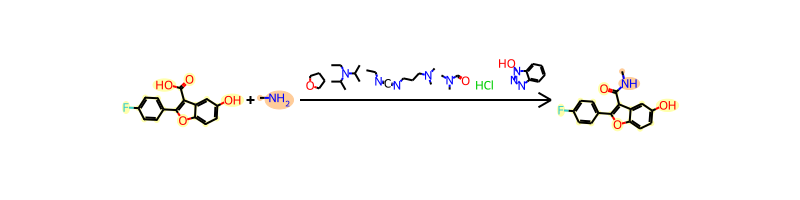

Displaying image [F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([OH:12])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1.[S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])(=[O:19])[N:29]([c:30]1[cH:31][cH:32][cH:33][cH:34][cH:35]1)[S:36]([C:37]([F:38])([F:39])[F:40])(=[O:41])=[O:42]>CCN(CC)CC.ClCCl>[F:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[o:7][c:8]3[cH:9][cH:10][c:11]([O:12][S:13]([C:14]([F:15])([F:16])[F:17])(=[O:18])=[O:19])[cH:20][c:21]3[c:22]2[C:23]([NH:24][CH3:25])=[O:26])[cH:27][cH:28]1


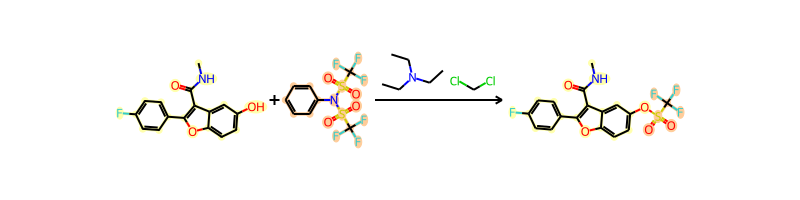

Displaying image [c:1]1([O:31][S:32]([C:33]([F:34])([F:35])[F:36])(=[O:37])=[O:38])[cH:12][cH:13][c:14]2[o:15][c:16](-[c:17]3[cH:18][cH:19][c:20]([F:21])[cH:22][cH:23]3)[c:24]([C:25](=[O:26])[NH:27][CH3:28])[c:29]2[cH:30]1.[c:2]1([B:39]([OH:40])[OH:41])[cH:3][c:4]([C:5]([OH:6])=[O:7])[cH:8][cH:9][c:10]1[Cl:11]>C1COCCO1.Cl.O.O=C([O-])[O-].[Cs+].[Cs+].c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2)(c2ccccc2)c2ccccc2)([P](c2ccccc2)(c2ccccc2)c2ccccc2)[P](c2ccccc2)(c2ccccc2)c2ccccc2)cc1>[c:1]1(-[c:2]2[cH:3][c:4]([C:5]([OH:6])=[O:7])[cH:8][cH:9][c:10]2[Cl:11])[cH:12][cH:13][c:14]2[o:15][c:16](-[c:17]3[cH:18][cH:19][c:20]([F:21])[cH:22][cH:23]3)[c:24]([C:25](=[O:26])[NH:27][CH3:28])[c:29]2[cH:30]1


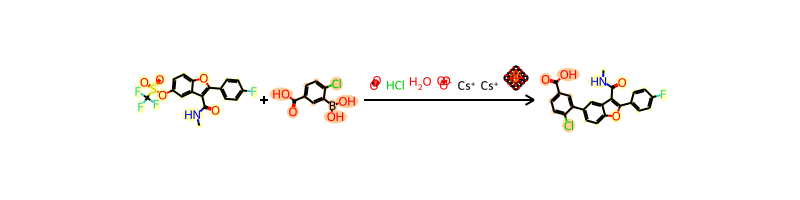

In [8]:
for r in original_route:
    display_img(r)

### Higher-level route reactions

In [9]:
higherlev_route

['[4CH:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12.[CH3:1][1NH2:2]>>[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12',
 '[5cH:19]1[cH:20][c:21]([C:22](=[O:23])[OH:24])[cH:25][cH:26][c:27]1[Cl:28].[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12>>[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][c:18](-[c:19]3[cH:20][c:21]([C:22](=[O:23])[OH:24])[cH:25][cH:26][c:27]3[Cl:28])[cH:29][c:30]12']

Displaying image [4CH:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12.[CH3:1][1NH2:2]>>[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12


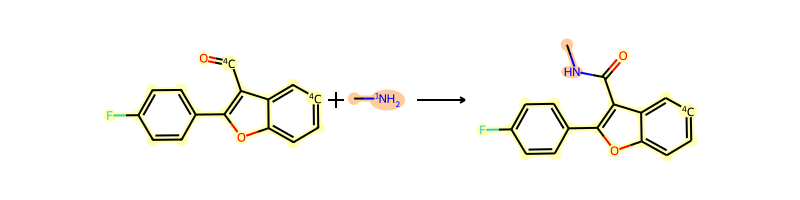

Displaying image [5cH:19]1[cH:20][c:21]([C:22](=[O:23])[OH:24])[cH:25][cH:26][c:27]1[Cl:28].[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][4cH:18][cH:29][c:30]12>>[CH3:1][NH:2][C:3](=[O:4])[c:5]1[c:6](-[c:7]2[cH:8][cH:9][c:10]([F:11])[cH:12][cH:13]2)[o:14][c:15]2[cH:16][cH:17][c:18](-[c:19]3[cH:20][c:21]([C:22](=[O:23])[OH:24])[cH:25][cH:26][c:27]3[Cl:28])[cH:29][c:30]12


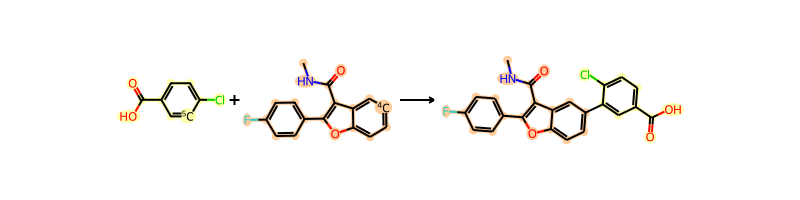

In [10]:
for r in higherlev_route:
    display_img(r)